In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder

In [42]:
chronic_kidney_disease = fetch_ucirepo(id=336)

In [43]:
X = chronic_kidney_disease.data.features 
Y = chronic_kidney_disease.data.targets 

описание признаков

In [66]:
df = pd.DataFrame(X)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [67]:
Y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [68]:
chronic_kidney_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,year,yes
1,bp,Feature,Integer,None,blood pressure,mm/Hg,yes
2,sg,Feature,Categorical,None,specific gravity,None,yes
3,al,Feature,Categorical,None,albumin,None,yes
4,su,Feature,Categorical,None,sugar,None,yes
5,rbc,Feature,Binary,None,red blood cells,None,yes
6,pc,Feature,Binary,None,pus cell,None,yes
7,pcc,Feature,Binary,None,pus cell clumps,None,yes
8,ba,Feature,Binary,None,bacteria,None,yes
9,bgr,Feature,Integer,None,blood glucose random,mgs/dl,yes


Проблемы прогнозирования

In [69]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [70]:
#Цель вопроса прогнозирования - предсказать, есть ли у человека хроническая болезнь почек, основываясь на его физическом состоянии здоровья
#class - это целевая переменная

Произвести чистку данных (**Data Cleaning**)

In [71]:
#Имеется 400 строк данных. Удалите столбцы с более чем 100 отсутствующими значениями
df.drop(columns=['rbc'], inplace=True)
df.drop(columns=['wbcc'], inplace=True)
df.drop(columns=['rbcc'], inplace=True)

In [74]:
#Заполнение недостающих значений
mode_value = df['age'].mode()[0]
df['age'] = df['age'].fillna(mode_value)
mode_value = df['bp'].mode()[0]
df['bp'] = df['bp'].fillna(mode_value)
mode_value = df['sg'].mode()[0]
df['sg'] = df['sg'].fillna(mode_value)
mode_value = df['al'].mode()[0]
df['al'] = df['al'].fillna(mode_value)
mode_value = df['su'].mode()[0]
df['su'] = df['su'].fillna(mode_value)
mode_value = df['pc'].mode()[0]
df['pc'] = df['pc'].fillna(mode_value)
mode_value = df['pcc'].mode()[0]
df['pcc'] = df['pcc'].fillna(mode_value)
mode_value = df['ba'].mode()[0]
df['ba'] = df['ba'].fillna(mode_value)
mode_value = df['bgr'].mode()[0]
df['bgr'] = df['bgr'].fillna(mode_value)
mode_value = df['bu'].mode()[0]
df['bu'] = df['bu'].fillna(mode_value)
mode_value = df['sc'].mode()[0]
df['sc'] = df['sc'].fillna(mode_value)
mode_value = df['sod'].mode()[0]
df['sod'] = df['sod'].fillna(mode_value)
mode_value = df['pot'].mode()[0]
df['pot'] = df['pot'].fillna(mode_value)
mode_value = df['hemo'].mode()[0]
df['hemo'] = df['hemo'].fillna(mode_value)
mode_value = df['pcv'].mode()[0]
df['pcv'] = df['pcv'].fillna(mode_value)
mode_value = df['htn'].mode()[0]
df['htn'] = df['htn'].fillna(mode_value)
mode_value = df['dm'].mode()[0]
df['dm'] = df['dm'].fillna(mode_value)
mode_value = df['cad'].mode()[0]
df['cad'] = df['cad'].fillna(mode_value)
mode_value = df['appet'].mode()[0]
df['appet'] = df['appet'].fillna(mode_value)
mode_value = df['pe'].mode()[0]
df['pe'] = df['pe'].fillna(mode_value)
mode_value = df['ane'].mode()[0]
df['ane'] = df['ane'].fillna(mode_value)

In [75]:
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

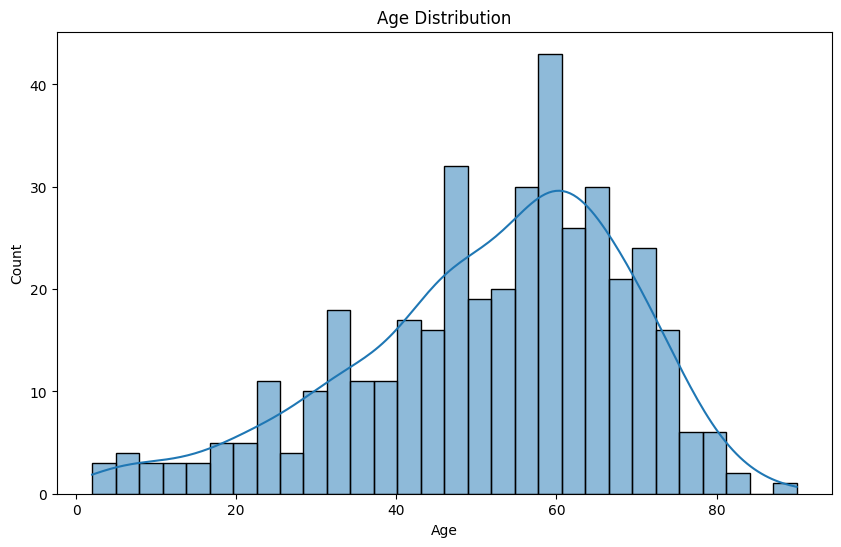

In [76]:
#Поле"target" относится к наличию сердечно-сосудистых заболеваний у пациента.Оно имеет целочисленное значение от 0(отсутствие)-4 
plt.figure(figsize=(10, 6))  
sns.histplot(df['age'], bins=30, kde=True)  
plt.title('Age Distribution')  
plt.xlabel('Age')  
plt.ylabel('Count')  
plt.show()

Выполнить преобразования данных

In [89]:
#трансформировать категариальные признаки в количественные
#чтобы построить матрицы корреляции
encoder = LabelEncoder()
categorical_features = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature].astype(str))

Провести анализ признаков

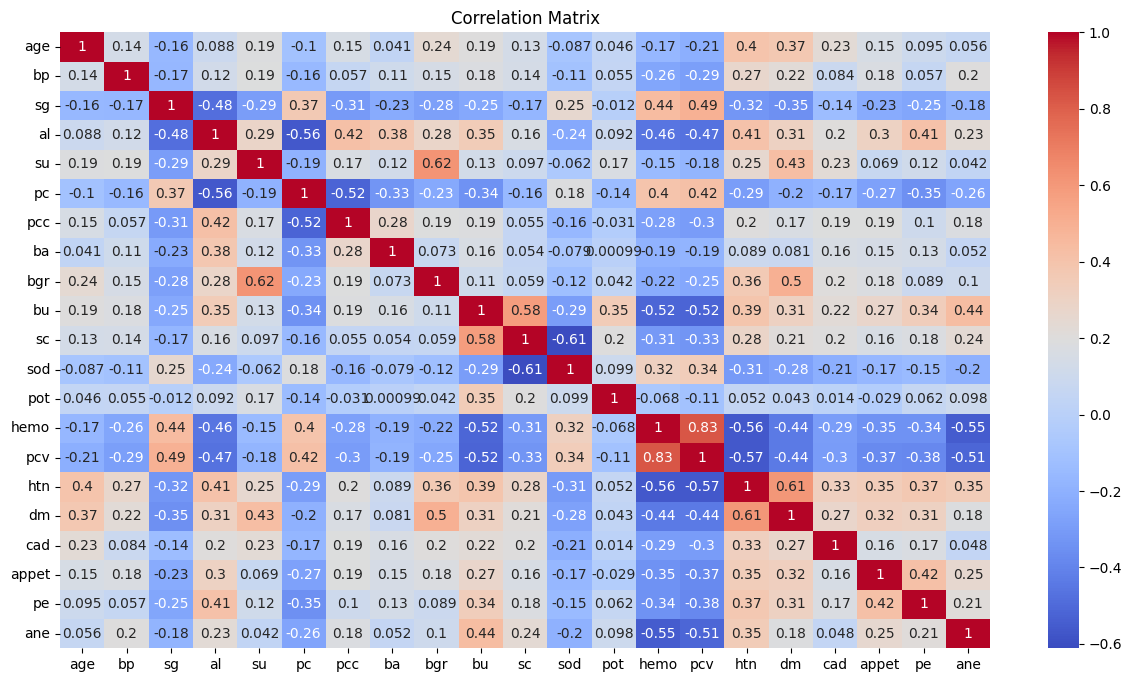

In [88]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix')  
plt.show()